# CMPUT 466 Final Project
Arun Woosaree

I will be doing binary classification with 3 different algorithms to detect spam in emails

In [ ]:
%%bash
pipenv install
kaggle datasets download -d uciml/sms-spam-collection-dataset
unzip -f sms-spam-collection-dataset.zip

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [7]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# drop the useless columns and rename spam: 1 ham: 0
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
data.replace({'spam': 1, 'ham': 0}, inplace=True)
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


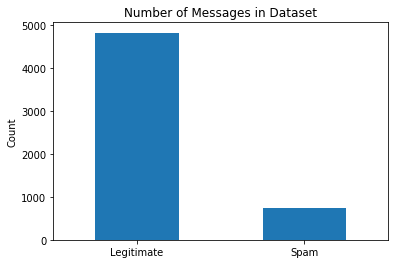

In [9]:
num = pd.value_counts(data['label'],sort=True).sort_index()
num.plot(kind='bar')
plt.title('Number of Messages in Dataset')
plt.xticks((0, 1), ("Legitimate", "Spam"), rotation=0)
plt.ylabel('Count')
# plt.show()
plt.savefig("images/histogram.png")

In [10]:

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV

X = TfidfVectorizer().fit_transform(data['text']).toarray()
t = data["label"]
print(f"Trivial classifier: all Legitimate accuracy: {accuracy_score(t, np.zeros_like(t))}")



Trivial classifier: all Legitimate accuracy: 0.8659368269921034


In [11]:
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html?highlight=validation%20curve
# https://www.dataquest.io/blog/learning-curves-machine-learning/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


# https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py


## Linear Classification
using sklearn

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()
# train_scores, valid_scores = validation_curve(LinearRegression(), X, t, param_name="normalize", param_range=(True, False), n_jobs=-1)
# plot_learning_curve(LinearRegression(), "Linear Regression", X, t, n_jobs=-1)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [11]:
# from sklearn.metrics import make_scorer
accuracies = cross_val_score(lr, X, t, n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[-5.81735193e+22 -3.90183420e+22 -1.00195543e+24 -1.74431420e+24
 -1.05794114e+24]


'Mean accuracy: -7.802805261478257e+23'

## Logistic regression


In [12]:
from sklearn.linear_model import LogisticRegression
# train_scores, valid_scores = validation_curve(LogisticRegression(), X, t, param_name="penalty", param_range=('l1',), n_jobs=-1)
# plot_learning_curve(LogisticRegression(), "Logistic Regression", X, t, n_jobs=-1)
lgr = LogisticRegression()
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
accuracies = cross_val_score(lgr, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.96143498 0.96233184 0.96140036 0.95691203 0.96319569]


'Mean accuracy: 0.9610549790276224'

In [14]:
params = {
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'penalty': ('l1', 'l2', 'elasticnet', 'none'),
}
lg_gs = GridSearchCV(lgr, params, n_jobs=-1, verbose=4)
lg_gs = lg_gs.fit(X, t)
print("best score", lg_gs.best_score_)
print("best params", lg_gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] penalty=l1, solver=liblinear ....................................
[CV] penalty=l1, solver=sag ..........................................
[CV] penalty=l1, solver=sag ..........................................
[CV] penalty=l1, solver=sag ..........................................
[CV] penalty=l1, solver=sag ..........................................
[CV] penalty=l1, solver=sag ..........................................
[CV] penalty=l1, solver=saga .........................................
[CV] penalty=l1, solver=saga .........................................
[CV] penalty=l1, solver=saga .........................................
[CV] penalty=l1, solver=saga .........................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/mod

[CV] ................ penalty=l1, solver=sag, score=nan, total=   0.4s
[CV] ................ penalty=l1, solver=sag, score=nan, total=   0.4s
[CV] penalty=l1, solver=saga .........................................
[CV] penalty=l2, solver=newton-cg ....................................
[CV] ................ penalty=l1, solver=sag, score=nan, total=   0.5s
[CV] ................ penalty=l1, solver=sag, score=nan, total=   0.5s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] penalty=l2, solver=newton-cg ....................................
[CV] ................ penalty=l1, solver=sag, score=nan, total=   0.5s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] ........ penalty=l1, solver=liblinear, score=0.951, total=   0.6s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] penalty=l1, solver=lbfgs ........................................
[CV] penalty=l1, solver=lbfgs ........................................
[CV] p

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed

[CV] .......... penalty=l1, solver=newton-cg, score=nan, total=   1.8s
[CV] .......... penalty=l1, solver=newton-cg, score=nan, total=   1.7s
[CV] .............. penalty=l1, solver=lbfgs, score=nan, total=   2.0s
[CV] .......... penalty=l1, solver=newton-cg, score=nan, total=   1.8s
[CV] .......... penalty=l1, solver=newton-cg, score=nan, total=   1.7s
[CV] .............. penalty=l1, solver=lbfgs, score=nan, total=   2.0s
[CV] .............. penalty=l1, solver=lbfgs, score=nan, total=   1.9s
[CV] .............. penalty=l1, solver=lbfgs, score=nan, total=   2.0s
[CV] .......... penalty=l1, solver=newton-cg, score=nan, total=   1.6s
[CV] .............. penalty=l1, solver=lbfgs, score=nan, total=   1.7s
[CV] ........ penalty=l1, solver=liblinear, score=0.966, total=   2.0s
[CV] penalty=l2, solver=lbfgs ........................................
[CV] penalty=l2, solver=lbfgs ........................................
[CV] ........ penalty=l1, solver=liblinear, score=0.967, total=   1.9s
[CV] p

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. penalty=elasticnet, solver=newton-cg, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=newton-cg ............................
[CV] ............ penalty=l2, solver=lbfgs, score=0.963, total=   7.9s
[CV] .. penalty=elasticnet, solver=newton-cg, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=newton-cg ............................
[CV] ............ penalty=l2, solver=lbfgs, score=0.962, total=   8.1s
[CV] penalty=elasticnet, solver=newton-cg ............................
[CV] penalty=elasticnet, solver=newton-cg ............................
[CV] .. penalty=elasticnet, solver=newton-cg, score=nan, total=   0.3s
[CV] ............ penalty=l2, solver=lbfgs, score=0.957, total=   8.2s
[CV] penalty=elasticnet, solver=lbfgs ................................
[CV] penalty=elasticnet, solver=lbfgs ................................
[CV] .. penalty=elasticnet, solver=newton-cg, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=lbfgs ................................
[CV] .

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fi

[CV] penalty=elasticnet, solver=lbfgs ................................
[CV] ...... penalty=elasticnet, solver=lbfgs, score=nan, total=   0.4s
[CV] ...... penalty=elasticnet, solver=lbfgs, score=nan, total=   0.2s
[CV] ...... penalty=elasticnet, solver=lbfgs, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=liblinear ............................
[CV] penalty=elasticnet, solver=liblinear ............................
[CV] penalty=elasticnet, solver=liblinear ............................


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit fa

[CV] ...... penalty=elasticnet, solver=lbfgs, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=liblinear ............................
[CV] .. penalty=elasticnet, solver=liblinear, score=nan, total=   0.2s
[CV] penalty=elasticnet, solver=liblinear ............................


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The 

[CV] .. penalty=elasticnet, solver=liblinear, score=nan, total=   0.3s
[CV] .. penalty=elasticnet, solver=liblinear, score=nan, total=   0.4s
[CV] penalty=elasticnet, solver=sag ..................................
[CV] penalty=elasticnet, solver=sag ..................................


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The 

[CV] .. penalty=elasticnet, solver=liblinear, score=nan, total=   0.4s
[CV] penalty=elasticnet, solver=sag ..................................
[CV] .. penalty=elasticnet, solver=liblinear, score=nan, total=   0.4s
[CV] penalty=elasticnet, solver=sag ..................................
[CV] ........ penalty=elasticnet, solver=sag, score=nan, total=   0.4s
[CV] penalty=elasticnet, solver=sag ..................................


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit fail

[CV] ........ penalty=elasticnet, solver=sag, score=nan, total=   0.5s
[CV] penalty=elasticnet, solver=saga .................................
[CV] ........ penalty=elasticnet, solver=sag, score=nan, total=   0.3s
[CV] ........ penalty=elasticnet, solver=sag, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=saga .................................
[CV] penalty=elasticnet, solver=saga .................................
[CV] ........ penalty=elasticnet, solver=sag, score=nan, total=   0.3s
[CV] penalty=elasticnet, solver=saga .................................
[CV] ....... penalty=elasticnet, solver=saga, score=nan, total=   0.2s
[CV] ....... penalty=elasticnet, solver=saga, score=nan, total=   0.4s
[CV] penalty=elasticnet, solver=saga .................................
[CV] penalty=none, solver=newton-cg ..................................


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   13.0s
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

[CV] ....... penalty=elasticnet, solver=saga, score=nan, total=   0.3s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ....... penalty=elasticnet, solver=saga, score=nan, total=   0.2s
[CV] ....... penalty=elasticnet, solver=saga, score=nan, total=   0.3s
[CV] penalty=none, solver=newton-cg ..................................
[CV] penalty=none, solver=newton-cg ..................................
[CV] ............. penalty=l2, solver=saga, score=0.961, total=   9.5s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ............. penalty=l2, solver=saga, score=0.961, total=   9.7s
[CV] penalty=none, solver=lbfgs ......................................
[CV] ............. penalty=l2, solver=saga, score=0.957, total=  10.3s
[CV] penalty=none, solver=lbfgs ......................................
[CV] .............. penalty=l2, solver=sag, score=0.957, total=  12.8s
[CV] .............. penalty=l2, solver=sag, score=0.962, total=  13.1s
[CV] p

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

[CV] ........ penalty=none, solver=liblinear, score=nan, total=   1.3s
[CV] penalty=none, solver=liblinear ..................................
[CV] ........ penalty=none, solver=liblinear, score=nan, total=   1.4s
[CV] penalty=none, solver=liblinear ..................................
[CV] ........ penalty=none, solver=liblinear, score=nan, total=   0.8s
[CV] ........ penalty=none, solver=liblinear, score=nan, total=   1.3s
[CV] penalty=none, solver=sag ........................................
[CV] ........ penalty=none, solver=liblinear, score=nan, total=   0.8s
[CV] penalty=none, solver=sag ........................................
[CV] penalty=none, solver=sag ........................................


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] ............. penalty=l2, solver=saga, score=0.963, total=  10.7s
[CV] penalty=none, solver=sag ........................................
[CV] ........ penalty=l2, solver=newton-cg, score=0.962, total=  21.5s
[CV] penalty=none, solver=sag ........................................
[CV] ........ penalty=l2, solver=newton-cg, score=0.963, total=  23.0s
[CV] penalty=none, solver=saga .......................................
[CV] ........ penalty=l2, solver=newton-cg, score=0.957, total=  23.9s
[CV] penalty=none, solver=saga .......................................
[CV] ........ penalty=l2, solver=newton-cg, score=0.961, total=  24.4s
[CV] penalty=none, solver=saga .......................................
[CV] ........ penalty=l2, solver=newton-cg, score=0.961, total=  24.8s
[CV] penalty=none, solver=saga .......................................
[CV] .......... penalty=none, solver=lbfgs, score=0.986, total=  11.9s
[CV] .......... penalty=none, solver=lbfgs, score=0.981, total=  10.8s
[CV] p

[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   29.1s remaining:    7.7s


[CV] .......... penalty=none, solver=lbfgs, score=0.983, total=  13.2s
[CV] ...... penalty=none, solver=newton-cg, score=0.985, total=  23.5s
[CV] ...... penalty=none, solver=newton-cg, score=0.983, total=  23.9s
[CV] ...... penalty=none, solver=newton-cg, score=0.983, total=  25.1s
[CV] ...... penalty=none, solver=newton-cg, score=0.980, total=  23.7s
[CV] ...... penalty=none, solver=newton-cg, score=0.981, total=  25.9s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............ penalty=none, solver=sag, score=0.985, total=  28.1s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............ penalty=none, solver=sag, score=0.981, total=  30.6s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............ penalty=none, solver=sag, score=0.980, total=  30.9s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............. penalty=l1, solver=saga, score=0.967, total=  52.0s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............. penalty=l1, solver=saga, score=0.970, total=  52.3s
[CV] ............. penalty=l1, solver=saga, score=0.951, total=  52.3s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............. penalty=l1, solver=saga, score=0.966, total=  53.9s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............. penalty=l1, solver=saga, score=0.951, total=  54.7s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ........... penalty=none, solver=saga, score=0.984, total=  30.9s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ............ penalty=none, solver=sag, score=0.984, total=  34.8s
[CV] ............ penalty=none, solver=sag, score=0.980, total=  33.7s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ........... penalty=none, solver=saga, score=0.981, total=  30.6s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ........... penalty=none, solver=saga, score=0.982, total=  32.4s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ........... penalty=none, solver=saga, score=0.980, total=  30.8s


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.4s finished


[CV] ........... penalty=none, solver=saga, score=0.980, total=  35.4s
best score 0.9824118636835706
best params {'penalty': 'none', 'solver': 'newton-cg'}


In [15]:
from sklearn.naive_bayes import MultinomialNB
# train_scores, valid_scores = validation_curve(MultinomialNB(), X, t, param_name="fit_prior", param_range=(True,), n_jobs=-1)
nb = MultinomialNB()
nb.get_params()
# plot_learning_curve(MultinomialNB(), "Multinomial Naive Bayes", X, t, n_jobs=-1)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [16]:
accuracies = cross_val_score(nb, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.9632287  0.95515695 0.95780969 0.9551167  0.96229803]


'Mean accuracy: 0.9587220133482541'

In [17]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
accuracies = cross_val_score(p, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.98116592 0.98116592 0.98204668 0.98025135 0.97935368]


'Mean accuracy: 0.9807967088261103'

In [19]:
params = {
    'penalty': ('l1', 'l2', 'elasticnet', 'none'),
    'max_iter': (500, 1000, 2000)
}
p_gs = GridSearchCV(p, params, n_jobs=-1, verbose=4, scoring="accuracy")
p_gs = p_gs.fit(X, t)
print("best score", p_gs.best_score_)
print("best params", p_gs.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_iter=500, penalty=l1 ........................................
[CV] max_iter=500, penalty=l1 ........................................
[CV] max_iter=500, penalty=l1 ........................................
[CV] max_iter=500, penalty=l1 ........................................
[CV] max_iter=500, penalty=l1 ........................................
[CV] max_iter=500, penalty=l2 ........................................
[CV] max_iter=500, penalty=l2 ........................................
[CV] max_iter=500, penalty=l2 ........................................
[CV] max_iter=500, penalty=l2 ........................................
[CV] max_iter=500, penalty=l2 ........................................
[CV] max_iter=500, penalty=elasticnet ................................
[CV] max_iter=500, penalty=elasticnet ................................
[CV] max_iter=500, penalty=elasticnet ................................
[CV] max_iter=50

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] .......... max_iter=500, penalty=none, score=0.981, total=   2.1s
[CV] .......... max_iter=500, penalty=none, score=0.981, total=   2.1s
[CV] max_iter=1000, penalty=l1 .......................................
[CV] max_iter=1000, penalty=l2 .......................................
[CV] .......... max_iter=500, penalty=none, score=0.979, total=   2.2s
[CV] max_iter=1000, penalty=l2 .......................................
[CV] ............ max_iter=500, penalty=l2, score=0.969, total=   2.3s
[CV] max_iter=1000, penalty=l2 .......................................
[CV] ............ max_iter=500, penalty=l2, score=0.954, total=   2.5s
[CV] .......... max_iter=500, penalty=none, score=0.982, total=   2.6s
[CV] .......... max_iter=500, penalty=none, score=0.980, total=   2.6s
[CV] max_iter=1000, penalty=l2 .......................................
[CV] max_iter=1000, penalty=l2 .......................................
[CV] ............ max_iter=500, penalty=l2, score=0.962, total=   2.6s
[CV] m

[Parallel(n_jobs=-1)]: Done  29 out of  60 | elapsed:    5.6s remaining:    6.0s


[CV] ......... max_iter=1000, penalty=none, score=0.981, total=   1.8s
[CV] max_iter=2000, penalty=elasticnet ...............................
[CV] ......... max_iter=1000, penalty=none, score=0.981, total=   1.9s
[CV] ......... max_iter=1000, penalty=none, score=0.980, total=   1.8s
[CV] max_iter=2000, penalty=elasticnet ...............................
[CV] max_iter=2000, penalty=none .....................................
[CV] ... max_iter=1000, penalty=elasticnet, score=0.954, total=   3.0s
[CV] max_iter=2000, penalty=none .....................................
[CV] ......... max_iter=1000, penalty=none, score=0.979, total=   2.2s
[CV] ........... max_iter=1000, penalty=l1, score=0.965, total=   4.2s
[CV] max_iter=2000, penalty=none .....................................
[CV] max_iter=2000, penalty=none .....................................
[CV] ... max_iter=1000, penalty=elasticnet, score=0.971, total=   3.9s
[CV] max_iter=2000, penalty=none .....................................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    7.7s remaining:    2.6s


[CV] ......... max_iter=2000, penalty=none, score=0.981, total=   1.5s
[CV] ......... max_iter=2000, penalty=none, score=0.980, total=   1.3s
[CV] ........... max_iter=2000, penalty=l1, score=0.976, total=   3.5s
[CV] ......... max_iter=2000, penalty=none, score=0.982, total=   1.4s
[CV] ......... max_iter=2000, penalty=none, score=0.979, total=   1.3s
[CV] ........... max_iter=2000, penalty=l1, score=0.965, total=   3.6s
[CV] ........... max_iter=2000, penalty=l1, score=0.965, total=   3.6s
[CV] ........... max_iter=2000, penalty=l1, score=0.967, total=   3.6s
[CV] ... max_iter=2000, penalty=elasticnet, score=0.969, total=   2.1s
[CV] ... max_iter=2000, penalty=elasticnet, score=0.971, total=   2.7s
[CV] ........... max_iter=2000, penalty=l1, score=0.965, total=   3.8s
[CV] ... max_iter=2000, penalty=elasticnet, score=0.954, total=   2.5s
[CV] ... max_iter=2000, penalty=elasticnet, score=0.962, total=   3.2s
[CV] ... max_iter=2000, penalty=elasticnet, score=0.966, total=   3.2s


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.8s finished


best score 0.9807967088261103
best params {'max_iter': 500, 'penalty': 'none'}


In [12]:
from sklearn.neural_network import MLPClassifier
# train_scores, valid_scores = validation_curve(MLPClassifier(), X, t, param_name="solver", param_range=('lbfgs', 'sgd', 'adam'), n_jobs=-1)
# plot_learning_curve(MLPClassifier(), "Multilayer Perceptron", X, t, n_jobs=-1)
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [21]:
accuracies = cross_val_score(mlp, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.98744395 0.98475336 0.98294434 0.98294434 0.98473968]


'Mean accuracy: 0.9845651351329593'

In [22]:
params = {
    'activation': ('relu', 'identity', 'logistic', 'tanh'),
    'hidden_layer_sizes': ((100), (100, 50, 25), (100, 80, 60, 40, 20, 10)),
    'learning_rate': ('invscaling', 'adaptive', 'constant'),
    'max_iter': (400, 800, 1600)
}
mlp_gs = GridSearchCV(mlp, params, n_jobs=-1, verbose=4)
mlp_gs = mlp_gs.fit(X, t)
print("best score", mlp_gs.best_score_)
print("best params", mlp_gs.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_i

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=800 
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=800 
[CV]  activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=1600, score=0.983, total=16.0min
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=800 
[CV]  activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, score=0.983, total=16.1min
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=1600 
[CV]  activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, score=0.983, total=16.2min
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=1600 
[CV]  activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=800, score=0.983, total=16.2min
[CV] activation=relu, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=1600 
[CV]  activation=relu, hidden_layer_size

[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 34.5min


[CV]  activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=800, score=0.987, total= 8.4min
[CV] activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, max_iter=1600 
[CV]  activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=1600, score=0.983, total= 7.4min
[CV] activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=400 
[CV]  activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=800, score=0.987, total= 8.5min
[CV] activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=400 
[CV]  activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=800, score=0.983, total= 8.5min
[CV] activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=400 
[CV]  activation=relu, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=800, score=0.982, total= 8.4min
[C

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 96.8min


[CV]  activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=1600, score=0.986, total=16.3min
[CV] activation=identity, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, max_iter=400 
[CV]  activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=800, score=0.980, total=16.9min
[CV] activation=identity, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, max_iter=400 
[CV]  activation=identity, hidden_layer_sizes=(100, 50, 25), learning_rate=invscaling, max_iter=400, score=0.985, total= 7.5min
[CV] activation=identity, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, max_iter=400 
[CV]  activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=1600, score=0.982, total=16.1min
[CV] activation=identity, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, max_iter=800 
[CV]  activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=1600, score=0.982, total=16.7min
[CV] activati

[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed: 231.5min


[CV]  activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=400, score=0.865, total=11.3min
[CV] activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=800 
[CV]  activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=800, score=0.865, total= 8.1min
[CV] activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=800 
[CV]  activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=400, score=0.866, total=12.1min
[CV] activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=1600 
[CV]  activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_iter=400, score=0.866, total=12.6min
[CV] activation=logistic, hidden_layer_sizes=(100, 80, 60, 40, 20, 10), learning_rate=invscaling, max_i

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 342.5min finished


best score 0.9856415293331509
best params {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'adaptive', 'max_iter': 800}


In [13]:
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive', max_iter=800)
accuracies = cross_val_score(mlp, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.98654709 0.98565022 0.98384201 0.97935368 0.98384201]


'Mean accuracy: 0.9838470022783812'